<h1 style="text-align: center;">Analisis Segmen Pelanggan dan Pola Pembelian<br>untuk Optimasi Pemasaran di Supermarket</h1>
<h3 style="text-align: center;">Jawed Iqbal Alfaruqiy</h3>

---

# Latar Belakang
Supermarket memiliki data pelanggan yang mencakup demografi, pola pembelian, dan respons kampanye pemasaran. Memahami perilaku pelanggan penting untuk meningkatkan strategi pemasaran dan penjualan. Dengan analisis data, supermarket dapat mengoptimalkan pemasaran, meningkatkan retensi pelanggan, dan mengelola stok lebih efisien melalui segmentasi pelanggan dan promosi yang dipersonalisasi.

## Pernyataan Masalah

Supermarket ingin mengetahui **segmen pelanggan bernilai tinggi dan pola pembelian mereka** agar dapat meningkatkan efektivitas pemasaran, mengurangi biaya promosi yang tidak efisien, dan mengoptimalkan pengelolaan stok

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik pelanggan yang memberikan kontribusi terbesar terhadap pendapatan supermarket, terutama dibandingkan pelanggan dengan pengeluaran lebih rendah?**

## Key Objective

Key Objective:

Untuk mengatasi permasalahan tersebut, beberapa tujuan utama dari analisis data ini adalah:

1. **Mengidentifikasi** segmen pelanggan berdasarkan data demografi dan pola pembelian guna meningkatkan personalisasi pemasaran.

1. **Menganalisis** efektivitas kampanye pemasaran dengan mengevaluasi tingkat respons pelanggan terhadap berbagai promosi.

1. **Mengungkap** pola pembelian pelanggan untuk membantu pengambilan keputusan dalam penawaran produk dan strategi harga.

1. **Memprediksi** loyalitas pelanggan dan mengembangkan strategi untuk meningkatkan keterlibatan serta retensi pelanggan.

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [Disini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK)

In [1613]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, stats
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

Supermarket Customers Data Dicitonary:  
- Customer
    - ID: Customer's unique identifier
    - Year_Birth: Customer's birth year
    - Education: Customer's education level
    - Marital_Status: Customer's marital status
    - Income: Customer's yearly household income
    - Kidhome: Number of children in customer's household
    - Teenhome: Number of teenagers in customer's household
    - Dt_Customer: Date of customer's enrollment with the company
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- Products
    - MntWines: Amount spent on wine in last 2 years
    - MntFruits: Amount spent on fruits in last 2 years
    - MntMeatProducts: Amount spent on meat in last 2 years
    - MntFishProducts: Amount spent on fish in last 2 years
    - MntSweetProducts: Amount spent on sweets in last 2 years
    - MntGoldProds: Amount spent on gold in last 2 years
- Promotion
    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
    - Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
- Place
    - NumWebPurchases: Number of purchases made through the company’s website
    - NumCatalogPurchases: Number of purchases made using a catalog
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to the company’s website in the last month

Berikut 5 baris teratas dan terbawah dari dataset supermarket customers:

In [1614]:
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset supermarket customers.

In [1615]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [1616]:
display(df.describe().round(3), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000,2240.000,2216.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,...,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.0,2240.0,2240.000
mean,5592.160,1968.806,52247.251,0.444,0.506,49.109,303.936,26.302,166.950,37.525,...,5.317,0.073,0.075,0.073,0.064,0.013,0.009,3.0,11.0,0.149
std,3246.662,11.984,25173.077,0.538,0.545,28.962,336.597,39.773,225.715,54.629,...,2.427,0.260,0.263,0.260,0.245,0.115,0.096,0.0,0.0,0.356
min,0.000,1893.000,1730.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
25%,2828.250,1959.000,35303.000,0.000,0.000,24.000,23.750,1.000,16.000,3.000,...,3.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
50%,5458.500,1970.000,51381.500,0.000,0.000,49.000,173.500,8.000,67.000,12.000,...,6.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
75%,8427.750,1977.000,68522.000,1.000,1.000,74.000,504.250,33.000,232.000,50.000,...,7.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
max,11191.000,1996.000,666666.000,2.000,2.000,99.000,1493.000,199.000,1725.000,259.000,...,20.000,1.000,1.000,1.000,1.000,1.000,1.000,3.0,11.0,1.000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [1617]:
# Gunakan None atau angka positif untuk max_colwidth
pd.set_option('display.max_colwidth', 1000)  # atau gunakan angka besar seperti 1000

# data unik di tiap kolom
listItem = []
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                         data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014,..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 328, 984, 295, 447, 712, 452, 523, 546, 398, 10, 688, 247, 856, 496, 25, 258, 565, 2, 721, 1032, 577, 64, 163, 17, 130, 292, 350, 135, 230, 7, 445, 15, 27, 505, 51, 207, 41, 386, 562, 217, 144, 454, 425, 133

Secara umum, kita bisa melihat bahwa:
* dataset supermarket_customer memiliki 2240 baris dan 29 kolom
* Pada `Marital_Status`: pada data `Single` atau `Alone` menunjukkan adanya nilai pada `Kidhome` atau `Teenhome` yang menunjukkan *household* tersebut memiliki anak. Tidak berarti itu adalah anak dari orang tersebut, besar kemungkinan adik atau kakak.
* `2n Cycle` Memiliki arti yang sama dengan `Graduation`
* Pada website [Europian union](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Marital_status#:~:text=There%20are%20several%20types%20of,in%20certain%20cases%2C%20registered%20partnership.) menunjukkan bahwa pada kolom `Marital_Status`: Status pernikahan pelanggan. Beberapa nilai seperti YOLO dan Absurd tidak relevan dan akan dikategorikan sebagai NaN. Beberapa kategori seperti Together bisa digabungkan dengan Married, dan Alone dengan Single.
* Beberapa kolom seperti `Income`, `Recency`, `Year_Birth`. Perlu dicek kembali agar tidak ada *outlier*
* Pada kolom `Income`, ada *missing value*.
* Adapun beberapa kolom yang dapat diabaikan seperti `Dt_Customer`, `Z_CostContact`, `Z_Revenue`, `ID` karena tidak memiliki pengaruh terhadap analisis ini.
* Pada kolom `Education` akan digabungkan dengan Master karena 2n Cycle memiliki nilai yang sama dengan Master.
* Pada `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`. Jumlah uang yang dihabiskan pelanggan untuk kategori produk tertentu dalam dua tahun terakhir. Perlu dicek apakah ada nilai ekstrem atau anomali.
* `NumDealsPurchases` Bisa digunakan untuk melihat apakah pelanggan cenderung membeli hanya saat ada promo.
* `Complain` Bisa digunakan untuk melihat hubungan dengan kepuasan pelanggan.
* Diketahui bahwa terakhir pelanggan berbelanja adalah pada tanggal 2014-09-08. maka dapat diasumsikan bahwa data terakhir didapat pada tahun 2014. sehingga kita dapat menambahkan kolom baru yaitu `Year_old` untuk mengetahui umur pelanggan saat ini, dengan cara `Year_old = 2014 - Year_Birth`.

### Missing Value

In [1618]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Dikarenakan *missing value* pada kolom hanya ada pada kolom `income` dengan proporsi yang sangat kecil (<2%), kita bisa menghapus baris yang mengandung *missing value* tersebut.

In [1619]:
# Menghapus Missing value
df.dropna(inplace=True)

In [1620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

Setelah semua jumlah data disamakan maka dapat dilakukan eksplorasi data lebih lanjut.


### Mengecek Duplikasi Data

In [1621]:
# Mengecek duplikasi berdasarkan subset kolom (misalnya tanpa mempertimbangkan ID)
df.duplicated(subset=['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer']).sum()

np.int64(201)

In [1622]:
df.drop_duplicates(subset=['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer'], inplace=True)

### Memperbaiki kolom
Pertama, Pada kolom `Marital_Status` kita harus menangani nilai yang tidak valid dengan cara mengubah data 'Alone' menjadi 'Single' dan 'Together' menjadi 'Married'.

Kemudian untuk `YOLO` dan `Absurd` ada 3 opsi, yakni:
1. Menghapus baris yang mengandung data ini
2. Mengganti nilai ini dengan `unknown`
3. Memasukkan kedalam **Kategori yang ada**

In [1623]:
df['Marital_Status'].value_counts()

Marital_Status
Married     781
Together    510
Single      436
Divorced    213
Widow        69
Alone         3
Absurd        2
YOLO          1
Name: count, dtype: int64

Melihat isi kolom yang memiliki nilai 'YOLO' dan 'Absurd' sebelum diganti:

In [1624]:
display(df[df['Marital_Status'] == 'YOLO'])
display(df[df['Marital_Status'] == 'Absurd'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,8,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,...,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,...,2,0,0,0,0,0,0,3,11,0


* Dari hasil kolom `YOLO` bahwa dari 1 data yang ada, itu menunjukkan masih memiliki **1 anggota keluarga** bersamanya dan pada artinya `YOLO` adalah *You Only Live Once* itu menunjukkan bahwa orang tersebut tidak memiliki pasangan. tetapi bisa masuk dalam kategori `Single`, `Divorced`, ataupun `Widow`.
* Sedangkan pada kolom `Absurd` bahwa dari 2 data yang ada, itu menunjukkan  **0 anggota keluarga** bersamanya dapat diartikan sebagai tidak memiliki pasangan. Yang berarti dapat dikategorikan `Single`.

Dapat disimpulkan bahwa data `YOLO` akan dihapus dikarenakan masih ambigu, sedangkan `Absurd` akan dimasukkan ke dalam kategori `Single`.

In [1625]:
# Menghapus data dengan Marital_Status "YOLO"
df = df[df['Marital_Status'] != 'YOLO']

# Menggabungkan "Alone/Absurd" dan "Together" menjadi "Single" dan "Married"
df.loc[df['Marital_Status']=='Alone', 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status']=='Absurd', 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status']=='Together', 'Marital_Status'] = 'Married'

In [1626]:
df['Marital_Status'].value_counts()

Marital_Status
Married     1291
Single       441
Divorced     213
Widow         69
Name: count, dtype: int64

Menggabungkan baris dengan nilai `2n Cycle` ke dalam baris `Graduation` karena memiliki arti yang sama.

In [1627]:
df.loc[df['Education'] == '2n Cycle', 'Education'] = 'Graduation'

 ### Memperbaiki Format Data

Mengubah `Year_Birth` menjadi `Age` agar lebih mudah digunakan.

In [1628]:
df['Age'] = 2014 - df['Year_Birth']

Menggabungkan `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, dan `MntGoldProds` menjadi `Total_Spending` untuk Mempermudah Analisis

In [1629]:
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

### Menghapus Kolom
Terakhir, kita akan menghapus kolom yang tidak dibutuhkan untuk analisis ini. Kolom yang akan dihapus adalah: `ID`. Kolom ini tidak memiliki informasi yang relevan untuk analisis ini.

Untuk kolom `Dt_Customer`, `Z_CostContact`, dan `Z_Revenue` juga akan kenapa dihapus adalah karena tujuan analisis ini adalah untuk mengetahui pola pembelian pelanggan. Oleh karena itu, membandingkan variabel yang tidak secara langsung berkaitan dengan kebiasaan belanja pelanggan tidak akan memberikan wawasan yang relevan.

In [1630]:
df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

Mengecek kembali isi keseluruhan data:

In [1631]:
display(df.head(), df.tail())

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending
0,1957,Graduation,Single,58138.0,0,0,58,3,8,10,...,7,0,0,0,0,0,0,1,57,1617
1,1954,Graduation,Single,46344.0,1,1,38,2,1,1,...,5,0,0,0,0,0,0,0,60,27
2,1965,Graduation,Married,71613.0,0,0,26,1,8,2,...,4,0,0,0,0,0,0,0,49,776
3,1984,Graduation,Married,26646.0,1,0,26,2,2,0,...,6,0,0,0,0,0,0,0,30,53
4,1981,PhD,Married,58293.0,1,0,94,5,5,3,...,5,0,0,0,0,0,0,0,33,422


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending
2233,1977,Graduation,Married,666666.0,1,0,23,4,3,1,...,6,0,0,0,0,0,0,0,37,62
2235,1967,Graduation,Married,61223.0,0,1,46,2,9,3,...,5,0,0,0,0,0,0,0,47,1341
2237,1981,Graduation,Divorced,56981.0,0,0,91,1,2,3,...,6,0,1,0,0,0,0,0,33,1241
2238,1956,Master,Married,69245.0,0,1,8,2,6,5,...,3,0,0,0,0,0,0,0,58,843
2239,1954,PhD,Married,52869.0,1,1,40,3,3,1,...,7,0,0,0,0,0,0,1,60,172


In [1632]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2014, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,Year_Birth,int64,0,59,"[1976, 1954]"
1,Education,object,0,4,"[Graduation, Master]"
2,Marital_Status,object,0,4,"[Single, Widow]"
3,Income,float64,0,1974,"[56242.0, 81300.0]"
4,Kidhome,int64,0,3,"[2, 1]"
5,Teenhome,int64,0,3,"[2, 0]"
6,Recency,int64,0,100,"[79, 8]"
7,NumDealsPurchases,int64,0,15,"[3, 6]"
8,NumWebPurchases,int64,0,15,"[0, 9]"
9,NumCatalogPurchases,int64,0,14,"[3, 28]"


In [1633]:
df_new = pd.read_csv('cleaned_supermarket_customers.csv')
display(df_new.head(),df_new.tail())

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending
0,1957,Graduation,Single,58138.0,0,0,58,3,8,10,...,7,0,0,0,0,0,0,1,57,1617
1,1954,Graduation,Single,46344.0,1,1,38,2,1,1,...,5,0,0,0,0,0,0,0,60,27
2,1965,Graduation,Married,71613.0,0,0,26,1,8,2,...,4,0,0,0,0,0,0,0,49,776
3,1984,Graduation,Married,26646.0,1,0,26,2,2,0,...,6,0,0,0,0,0,0,0,30,53
4,1981,PhD,Married,58293.0,1,0,94,5,5,3,...,5,0,0,0,0,0,0,0,33,422


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending
2009,1977,Graduation,Married,666666.0,1,0,23,4,3,1,...,6,0,0,0,0,0,0,0,37,62
2010,1967,Graduation,Married,61223.0,0,1,46,2,9,3,...,5,0,0,0,0,0,0,0,47,1341
2011,1981,Graduation,Divorced,56981.0,0,0,91,1,2,3,...,6,0,1,0,0,0,0,0,33,1241
2012,1956,Master,Married,69245.0,0,1,8,2,6,5,...,3,0,0,0,0,0,0,0,58,843
2013,1954,PhD,Married,52869.0,1,1,40,3,3,1,...,7,0,0,0,0,0,0,1,60,172


In [1634]:
display(df_new.describe().round(3), df_new.describe(include='object'))

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending
count,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000
mean,1968.782,52363.968,0.442,0.506,49.013,2.326,4.098,2.669,5.784,5.312,0.073,0.075,0.072,0.066,0.013,0.010,0.150,45.218,607.367
std,11.987,25586.878,0.536,0.547,28.948,1.924,2.759,2.941,3.237,2.437,0.261,0.264,0.259,0.248,0.113,0.099,0.357,11.987,602.942
min,1893.000,1730.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.000,5.000
25%,1959.000,35528.250,0.000,0.000,24.000,1.000,2.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,37.000,69.000
50%,1970.000,51550.000,0.000,0.000,49.000,2.000,4.000,2.000,5.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,44.000,396.000
75%,1977.000,68648.000,1.000,1.000,74.000,3.000,6.000,4.000,8.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,55.000,1047.750
max,1996.000,666666.000,2.000,2.000,99.000,15.000,27.000,28.000,13.000,20.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,121.000,2525.000


,Education,Marital_Status
count,2014,2014
unique,4,4
top,Graduation,Married
freq,1197,1291


# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Bagaimana karakteristik pelanggan yang memberikan kontribusi terbesar terhadap pendapatan supermarket, terutama dibandingkan pelanggan dengan pengeluaran lebih rendah?**.

Analisis akan dilakukan dengan membandingkan pelanggan berdasarkan pola pembelian dan karakteristiknya. Tujuan utama adalah memahami faktor-faktor yang memengaruhi perilaku belanja pelanggan.

Dari **2216 data pelanggan**, kita akan melihat perbedaan perilaku berdasarkan berbagai fitur seperti **umur, status pernikahan, tingkat pendidikan, pendapatan, serta kebiasaan belanja**.

Karena data ini memiliki berbagai fitur numerik dan kategorikal, maka:

* **Untuk data kategorikal**, perbandingan akan dilakukan berdasarkan **proporsi (%)**, bukan hanya jumlah absolut, agar lebih akurat dalam memahami distribusi.
* **Untuk data numerik**, analisis dilakukan dengan melihat **rata-rata, median, serta distribusi (skewness & outliers)** guna memahami kecenderungan dan variasi antar pelanggan.
Selain itu, kita juga akan melihat **pola pembelian dan efektivitas kampanye pemasaran**, untuk mengetahui apakah ada perbedaan signifikan antara pelanggan yang menerima promo dengan yang tidak.

## 1. Berdasarkan Usia: `Age`

Untuk memahami bagaimana usia pelanggan memengaruhi perilaku pengeluaran, serta apakah kelompok usia tertentu memiliki kecenderungan berbelanja lebih banyak dibanding yang lain. Maka diperlukan analisis berikut:

* Bagaimana distribusi usia pelanggan supermarket?
* Apakah usia mempengaruhi total pengeluaran?
* Usia berapa yang menjadi kontributor pengeluaran tertinggi?
* Apakah ada hubungan antara usia dan total pengeluaran?

In [1635]:
# Buat kelompok usia
bins = [18, 30, 45, 60, 80, 130]
labels = ['18-30', '31-45', '46-60', '61-80', '81+']
df_new['Age_Group'] = pd.cut(df_new['Age'], bins=bins, labels=labels, right=False)

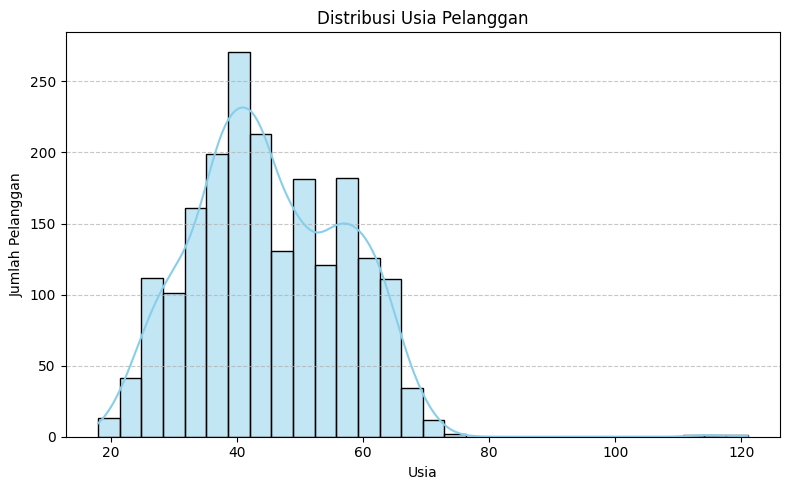

In [1636]:
# Analisis 1: Distribusi Usia Pelanggan
plt.figure(figsize=(8, 5))
sns.histplot(df_new['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Distribusi usia pelanggan sebagian besar berada dalam rentang usia produktif antara 30 hingga 60 tahun, dengan puncak di sekitar usia 40-an. Hal ini menunjukkan bahwa pelanggan supermarket didominasi oleh kelompok usia dewasa yang cenderung sudah mapan dalam finansial.

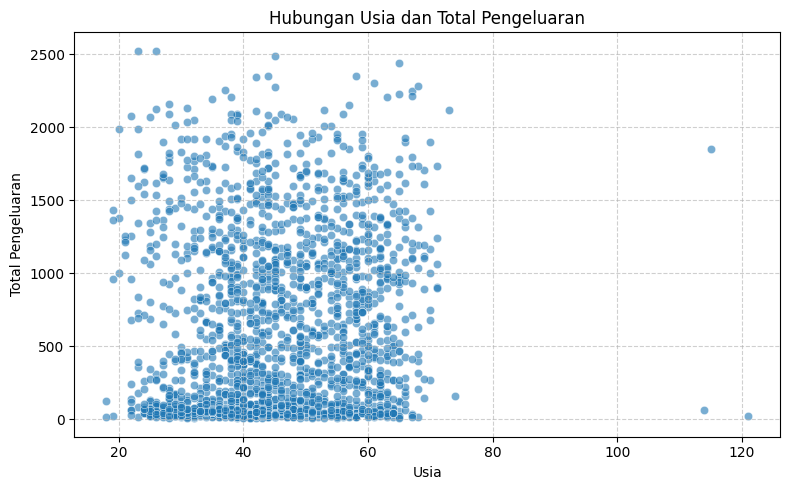

Korelasi antara usia dan total pengeluaran: 0.12


In [1637]:
# Analisis 2: Pengeluaran vs Usia
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_new, x='Age', y='Total_Spending', alpha=0.6)
plt.title('Hubungan Usia dan Total Pengeluaran')
plt.xlabel('Usia')
plt.ylabel('Total Pengeluaran')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Korelasi
correlation_age = df_new[['Age', 'Total_Spending']].corr().iloc[0, 1]
print(f"Korelasi antara usia dan total pengeluaran: {correlation_age:.2f}")


Ditemukan **korelasi sebesar 0.12**, menunjukkan bahwa hubungan antara usia dan total pengeluaran positif sangat lemah. Artinya, usia bukanlah faktor yang sangat menentukan besarnya pengeluaran. Namun, ada tren menarik di mana pelanggan usia 46–80 tahun justru memiliki rata-rata pengeluaran lebih tinggi, khususnya kelompok 61–80 tahun.

,count,mean,median,min,max
Age_Group,,,,,
18-30,195,590.005128,169.0,10,2525
31-45,852,526.534038,240.5,5,2349
46-60,679,655.671576,528.0,6,2486
61-80,285,745.400000,637.0,8,2440
81+,3,646.666667,65.0,22,1853


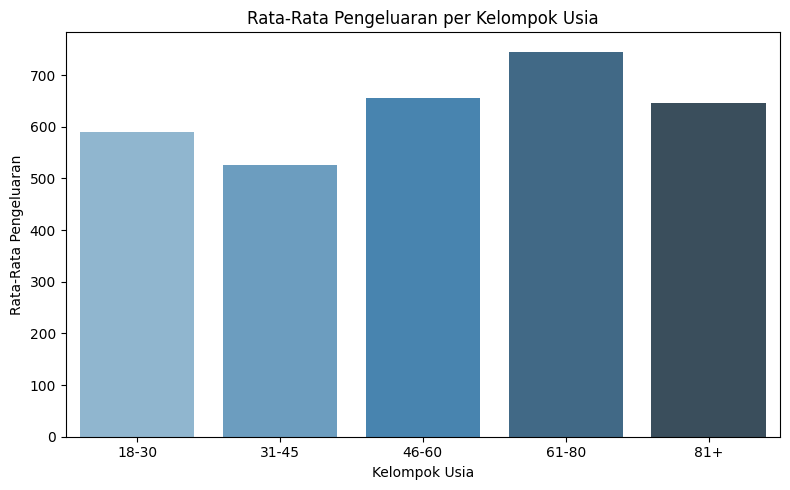

In [1638]:
age_group_stats = df_new.groupby('Age_Group')['Total_Spending'].agg(['count', 'mean', 'median', 'min', 'max']).sort_index()
display(age_group_stats)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=df_new, x='Age_Group', y='Total_Spending', estimator=np.mean, ci=None, palette='Blues_d')
plt.title('Rata-Rata Pengeluaran per Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Rata-Rata Pengeluaran')
plt.tight_layout()
plt.show()

Overall:

* Mayoritas pelanggan berada pada kelompok usia 31–60 tahun – fase usia produktif yang secara umum memiliki kestabilan finansial dan kebutuhan konsumsi tinggi. Ini menjadikannya target utama untuk strategi pemasaran.
* Kelompok usia 61–80 tahun memiliki pengeluaran rata-rata dan median tertinggi (mean: 745.4, median: 637), diikuti oleh 46–60 tahun (mean: 655.7, median: 528). Meskipun jumlahnya lebih sedikit, mereka menunjukkan potensi loyalitas dan daya beli tinggi – kemungkinan karena sudah tidak memiliki beban keluarga besar atau stabil secara finansial.
* Kelompok usia muda (18–30) menjadi pasar potensial yang belum tergarap secara optimal, sementara kelompok lansia adalah segmen yang loyal dan berani membelanjakan lebih banyak.

Berdasarkan kategori Income, pelanggan usia 46–80 tahun sering kali masuk dalam kelompok pendapatan menengah ke atas (50K+), yang konsisten dengan tingginya pengeluaran mereka. Dalam kategori `Marital_Status`, pelanggan berusia di atas 45 cenderung sudah menikah atau berpasangan, yang berarti pembelian bukan hanya untuk diri sendiri, tetapi untuk keluarga.

Dapat disimpulkan bahwa, kelompok usia 61–80 mencatat rata-rata pengeluaran tertinggi (745.4), diikuti kelompok 46–60 (655.7). Hal ini mengindikasikan bahwa pelanggan lansia memiliki daya beli yang kuat, kemungkinan karena pendapatan pensiun tetap atau prioritas pengeluaran yang berbeda. Strategi loyalitas usia lanjut atau program personalisasi berdasarkan usia bisa diterapkan.

## 2. Berdasarkan Pendapatan Pelanggan: `Income`

Memahami bagaimana tingkat pendapatan pelanggan memengaruhi total pengeluaran mereka di supermarket, serta mengidentifikasi kelompok pendapatan mana yang berkontribusi paling signifikan terhadap penjualan.

* Bagaimana distribusi pendapatan pelanggan?
* Apakah terdapat korelasi antara pendapatan dan total pengeluaran?
* Bagaimana rata-rata pengeluaran berdasarkan kelompok pendapatan?
* Apakah ada pola pengeluaran yang berbeda di antara kelompok pendapatan?

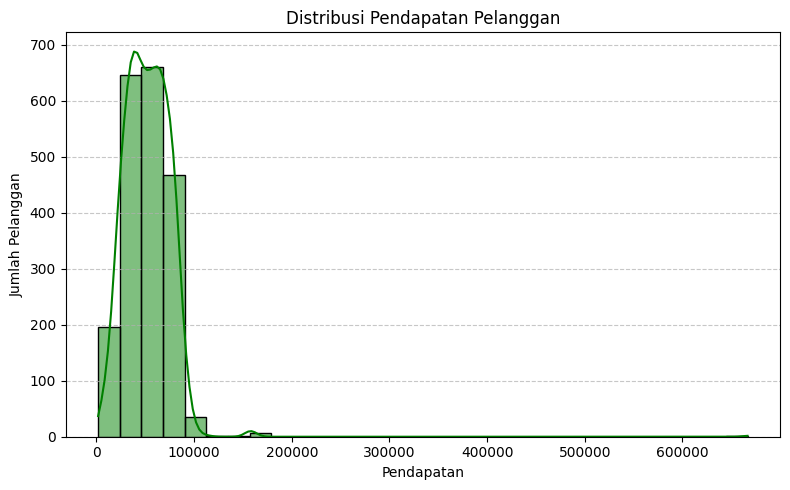

In [1639]:
# Analisis 1: Distribusi Pendapatan Pelanggan
plt.figure(figsize=(8, 5))
sns.histplot(df_new['Income'], bins=30, kde=True, color='green')
plt.title('Distribusi Pendapatan Pelanggan')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Distribusi pendapatan pelanggan menunjukkan mayoritas pelanggan memiliki pendapatan di kisaran 25.000 hingga 75.000, dengan sedikit pelanggan di atas 100.000. Data menunjukkan sedikit skew ke kanan, artinya terdapat kelompok kecil pelanggan dengan pendapatan sangat tinggi.

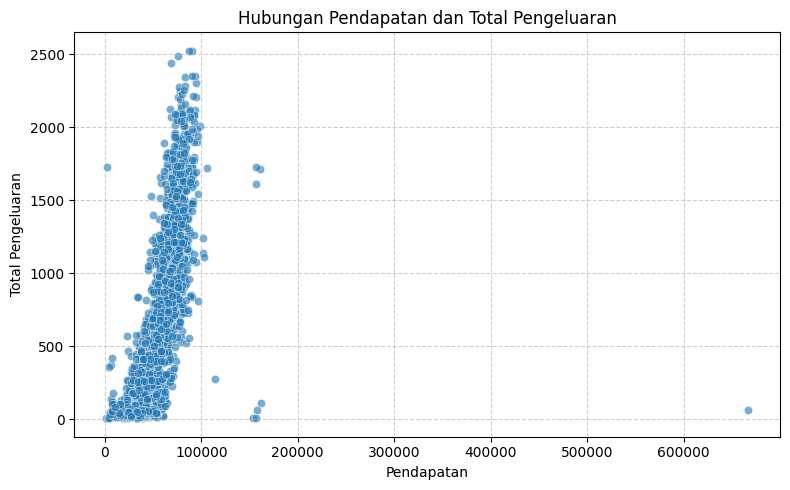

Korelasi antara pendapatan dan total pengeluaran: 0.65


In [1640]:
# Analisis 2: Korelasi antara Pendapatan dan Total Pengeluaran
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_new, x='Income', y='Total_Spending', alpha=0.6)
plt.title('Hubungan Pendapatan dan Total Pengeluaran')
plt.xlabel('Pendapatan')
plt.ylabel('Total Pengeluaran')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

correlation_income = df_new[['Income', 'Total_Spending']].corr().iloc[0, 1]
print(f"Korelasi antara pendapatan dan total pengeluaran: {correlation_income:.2f}")


Korelasi antara `Income` dan `Total_Spending` adalah 0.65, yang berarti terdapat hubungan positif cukup kuat antara pendapatan dan total pengeluaran pelanggan. Pelanggan dengan pendapatan yang lebih tinggi cenderung membelanjakan lebih banyak. Ini menjadikan pendapatan sebagai faktor penting dalam strategi targeting dan segmentasi.

Sebelumnya kita menemukan bahwa kelompok usia 61–80 memiliki rata-rata pengeluaran tertinggi. Temuan pada pendapatan ini menunjukkan bahwa mungkin mereka berasal dari kelompok berpenghasilan menengah ke atas, sehingga mendukung tingginya pengeluaran di usia tersebut.

,count,mean,median,min,max
Income_Group,,,,,
<30K,336,73.142857,49.0,5,1730
30K-60K,916,301.867904,184.0,8,1662
60K-90K,712,1187.349719,1161.0,18,2524
90K-120K,42,1701.452381,1731.0,277,2525
>120K,8,662.125000,84.5,6,1730


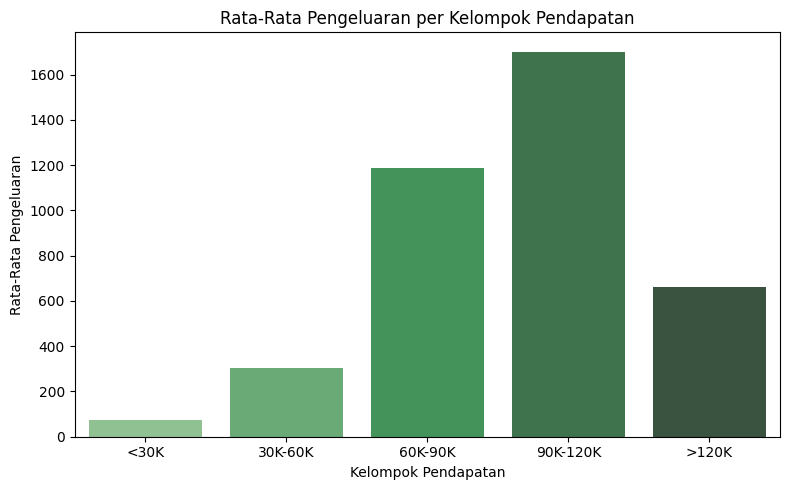

In [1641]:
# Analisis 3: Rata-Rata Pengeluaran Berdasarkan Kelompok Pendapatan
income_bins = [0, 30000, 60000, 90000, 120000, np.inf]
income_labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '>120K']
df_new['Income_Group'] = pd.cut(df_new['Income'], bins=income_bins, labels=income_labels)

income_group_stats = df_new.groupby('Income_Group')['Total_Spending'].agg(['count', 'mean', 'median', 'min', 'max']).sort_index()
display(income_group_stats)

plt.figure(figsize=(8, 5))
sns.barplot(data=df_new, x='Income_Group', y='Total_Spending', estimator=np.mean, ci=None, palette='Greens_d')
plt.title('Rata-Rata Pengeluaran per Kelompok Pendapatan')
plt.xlabel('Kelompok Pendapatan')
plt.ylabel('Rata-Rata Pengeluaran')
plt.tight_layout()
plt.show()

* Kelompok 90K–120K merupakan yang memiliki rata-rata pengeluaran tertinggi (~1.700). Ini menunjukkan bahwa segmen ini merupakan target potensial untuk kampanye pemasaran dan promosi intensif.
* Kelompok >120K justru menunjukkan penurunan rata-rata pengeluaran (~660), meskipun memiliki penghasilan tertinggi. Hal ini bisa mencerminkan perilaku konsumsi yang lebih selektif atau preferensi menabung/investasi yang lebih tinggi.
* Kelompok <30K hanya membelanjakan rata-rata ~80, jauh lebih rendah dibanding kelompok lainnya. Artinya, kelompok ini memiliki daya beli terbatas dan bukan target utama untuk produk premium.

Temuan Utama:
* Rata-rata pengeluaran meningkat seiring dengan kenaikan pendapatan hingga kelompok 90K–120K, yang mencatat pengeluaran tertinggi (~1.700). Ini adalah segmen dengan daya beli tertinggi dan responsif terhadap konsumsi.
* Penurunan tajam pada kelompok >120K (~660) menunjukkan bahwa pendapatan tinggi tidak selalu berkorelasi positif dengan pengeluaran. Bisa jadi karena kecenderungan kelompok ini untuk berhemat, berinvestasi, atau memiliki preferensi terhadap merek/produk eksklusif yang tidak tercatat dalam total pengeluaran dataset ini.
* Kelompok berpendapatan rendah (<30K dan 30K–60K) secara konsisten mencatat pengeluaran minimal (~80 hingga ~300), mencerminkan keterbatasan daya beli mereka. Segmentasi terhadap kelompok ini harus lebih selektif.
* Korelasi antara pendapatan dan total pengeluaran berada pada angka +0.65, yang menunjukkan hubungan positif cukup kuat—semakin tinggi pendapatan, kecenderungan untuk mengeluarkan lebih besar juga meningkat, meski tidak selalu linier.

## 3. Berdasarkan Tingkat Pendidikan Pelanggan: `Education`

Mengevaluasi bagaimana tingkat pendidikan memengaruhi total pengeluaran pelanggan, serta menelusuri potensi segmentasi berdasarkan pendidikan.

* Bagaimana distribusi jumlah pelanggan berdasarkan tingkat pendidikan?
* Apakah terdapat perbedaan signifikan pada pengeluaran berdasarkan tingkat pendidikan?
* Tingkat pendidikan mana yang memiliki pengeluaran rata-rata tertinggi?

In [1642]:
education_counts = df_new['Education'].value_counts()
education_counts

Education
Graduation    1197
PhD            436
Master         332
Basic           49
Name: count, dtype: int64

In [1643]:
education_spending = df_new.groupby('Education')['Total_Spending'].agg(['count', 'mean', 'median']).sort_values(by='mean', ascending=False)
education_spending

,count,mean,median
Education,,,
PhD,436,672.802752,494.0
Master,332,610.987952,391.5
Graduation,1197,603.956558,384.0
Basic,49,83.918367,57.0


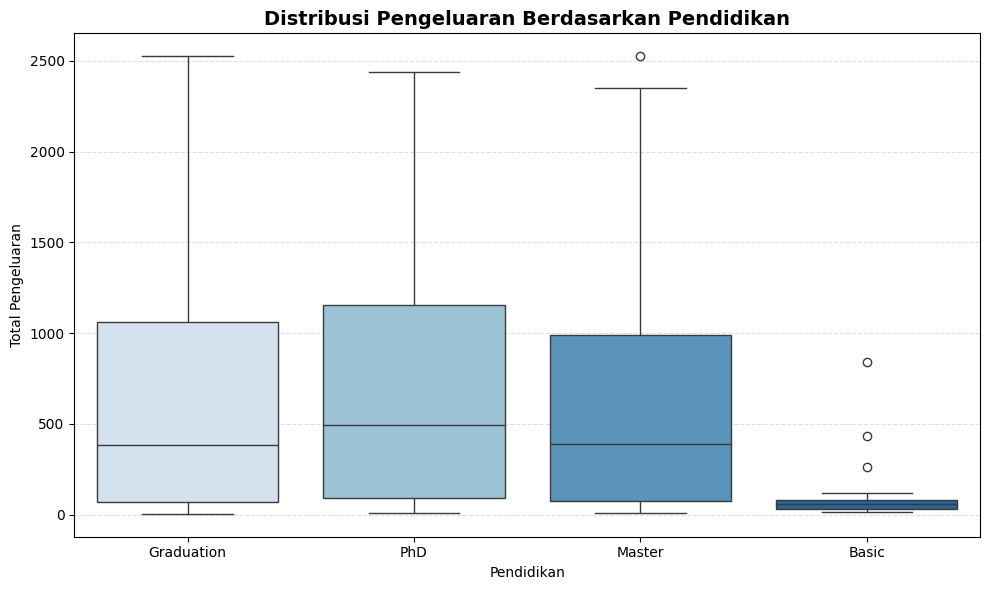

In [1644]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new, x='Education', y='Total_Spending', palette='Blues')
plt.title('Distribusi Pengeluaran Berdasarkan Pendidikan', fontsize=14, fontweight='bold')
plt.xlabel('Pendidikan')
plt.ylabel('Total Pengeluaran')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Pelanggan dengan tingkat pendidikan lebih tinggi seperti PhD dan Master menunjukkan tingkat pengeluaran yang lebih besar dibandingkan dengan kelompok Basic. Ini mengindikasikan bahwa latar belakang pendidikan bisa menjadi indikator penting untuk segmentasi pasar, karena berkorelasi dengan daya beli atau preferensi pengeluaran. Seperti hasil kesimpulan di bawah:

* Distribusi Pelanggan:
    * Mayoritas pelanggan berasal dari kelompok pendidikan Graduation (1.197 orang), diikuti oleh PhD (436), Master (332), dan paling sedikit dari Basic (49).
    * Hal ini menunjukkan bahwa target pasar bisnis ini didominasi oleh individu dengan latar belakang pendidikan tinggi.

* Pengeluaran per Pendidikan:
    * Pelanggan dengan gelar PhD memiliki rata-rata pengeluaran tertinggi sebesar 672.80, diikuti oleh Master (610.99) dan Graduation (603.96).
    * Kelompok Basic memiliki pengeluaran rata-rata yang sangat rendah (83.92), menunjukkan keterbatasan daya beli atau ketertarikan dalam produk/jasa yang ditawarkan.

* Variabilitas Pengeluaran:
    * Pada visualisasi boxplot, terlihat bahwa kelompok PhD dan Master memiliki rentang pengeluaran yang lebar dan cenderung lebih tinggi.
    * Sementara kelompok Basic memiliki persebaran pengeluaran yang sangat sempit, menunjukkan konsistensi pada tingkat pengeluaran rendah.

## 4. Berdasarkan Status Pernikahan Pelanggan: `Marital_Status`

Mengevaluasi pengaruh status pernikahan terhadap perilaku belanja dan keterlibatan dalam kampanye pemasaran.

* Bagaimana distribusi jumlah pelanggan berdasarkan status pernikahan?
* Apakah status pernikahan memengaruhi total pengeluaran pelanggan?
* Apakah terdapat perbedaan spending antar status pernikahan yang signifikan?

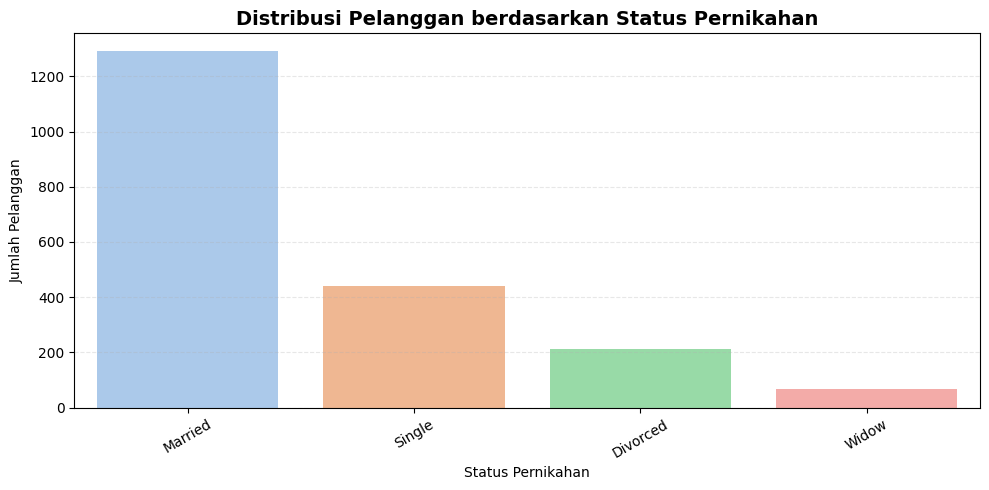

In [1645]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_new, x='Marital_Status', palette='pastel', order=df_new['Marital_Status'].value_counts().index)
plt.title('Distribusi Pelanggan berdasarkan Status Pernikahan', fontsize=14, fontweight='bold')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Mayoritas pelanggan memiliki status `Married`, menandakan bahwa pelanggan dengan pasangan `Married` adalah demografi dominan dalam data ini.

In [1646]:
marital_spending = df_new.groupby('Marital_Status')['Total_Spending'].agg(['count', 'mean', 'median']).sort_values(by='mean', ascending=False)
marital_spending

,count,mean,median
Marital_Status,,,
Widow,69,743.797101,636.0
Divorced,213,608.093897,384.0
Single,441,608.052154,369.0
Married,1291,599.721921,397.0


Pelanggan dengan status `Married` memiliki rata-rata pengeluaran tertinggi, sementara Divorced dan Widow berada di posisi bawah.
Hal ini dapat dihubungkan dengan faktor stabilitas ekonomi: pelanggan yang memiliki pasangan cenderung memiliki pendapatan rumah tangga yang lebih besar atau kebutuhan konsumsi lebih tinggi.

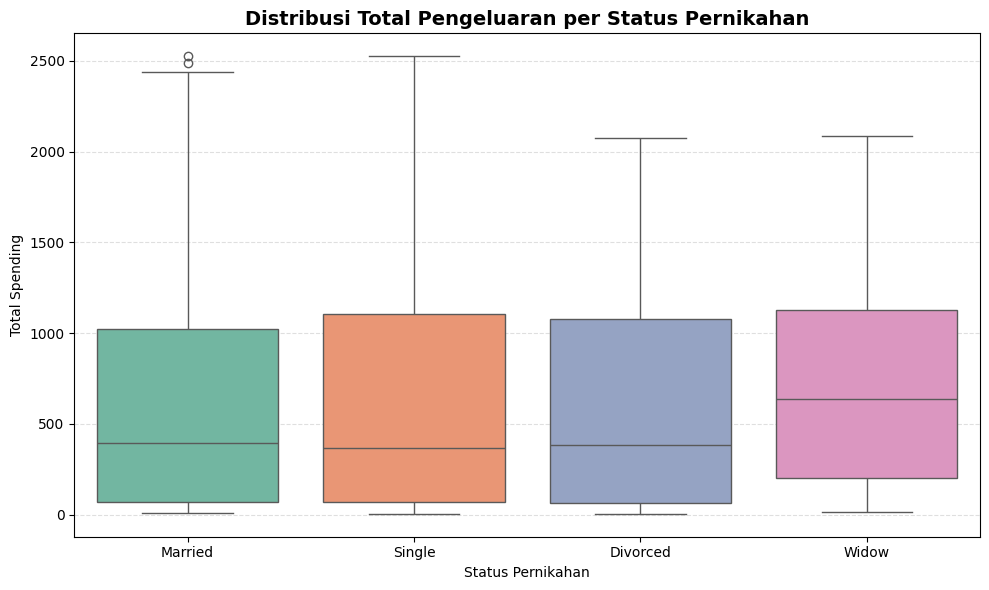

In [1647]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new, x='Marital_Status', y='Total_Spending', palette='Set2', order=df_new['Marital_Status'].value_counts().index)
plt.title('Distribusi Total Pengeluaran per Status Pernikahan', fontsize=14, fontweight='bold')
plt.xlabel('Status Pernikahan')
plt.ylabel('Total Spending')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

* Variasi pengeluaran terbesar terlihat pada kelompok Married dan Single.
* Kelompok Divorced dan Widow cenderung memiliki median pengeluaran lebih rendah dengan outlier minimal.
* Ini mencerminkan potensi perbedaan gaya hidup dan daya beli berdasarkan status pernikahan.

Overall:

Dari hasil analisis, terlihat bahwa pelanggan berstatus Married mendominasi jumlah pelanggan secara keseluruhan. Namun, jika kita lihat dari sisi pengeluaran, kelompok Single dan Divorced memiliki pengeluaran rata-rata yang relatif tinggi. Hal ini bisa jadi karena mereka lebih mandiri secara finansial dan cenderung berbelanja untuk diri sendiri.

Hasil ini berkorelasi dengan temuan pada kategori `Age`, di mana kelompok usia lebih tua (61–80) memiliki pengeluaran tertinggi. Status Widow umumnya beririsan dengan kelompok usia lanjut, yang juga menunjukkan pengeluaran tinggi, sehingga memperkuat asumsi bahwa umur dan status hidup berpengaruh terhadap perilaku belanja.

## 5. Berdasarkan Kampanye: `AcceptedCmp1` - `AcceptedCmp5`

* Seberapa besar proporsi pelanggan yang merespons masing-masing kampanye (AcceptedCmp1–5)?
* Apakah pelanggan yang merespons kampanye memiliki pengeluaran (Total_Spending) lebih tinggi?
* Bagaimana rata-rata pengeluaran pelanggan yang merespons kampanye jika dilihat dari status Response?
* Apakah ada perbedaan pola respons kampanye pada kelompok umur tertentu (Age_Group)?

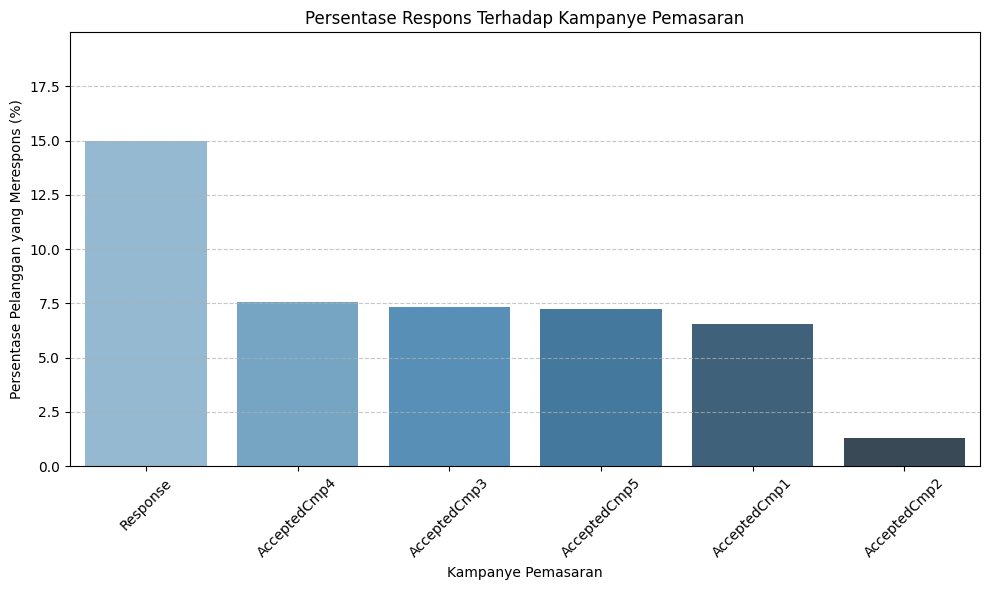

In [1648]:
kampanye_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_response = df_new[kampanye_cols].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_response.index, y=campaign_response.values, palette='Blues_d')
plt.ylabel("Persentase Pelanggan yang Merespons (%)")
plt.xlabel("Kampanye Pemasaran")
plt.title("Persentase Respons Terhadap Kampanye Pemasaran")
plt.ylim(0, campaign_response.max() + 5)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Kampanye ke-3 (AcceptedCmp3) adalah yang paling berhasil, sedangkan kampanye pertama (AcceptedCmp1) memiliki respons paling rendah.

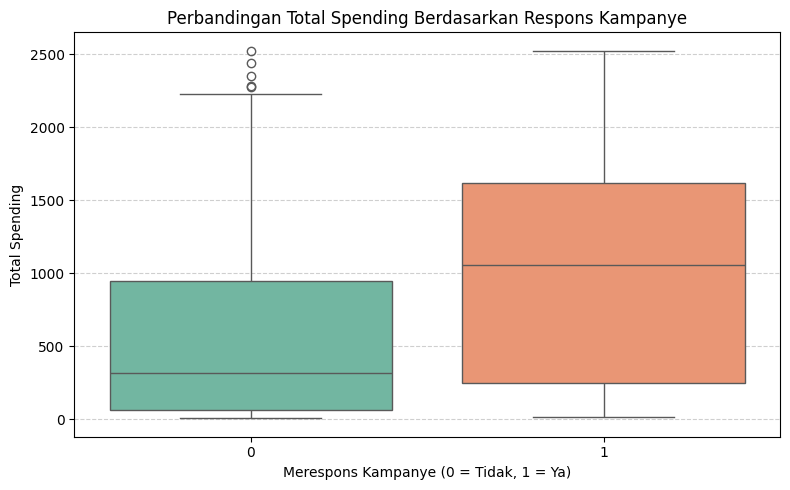

In [1649]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Response', y='Total_Spending', data=df_new, palette='Set2')
plt.title('Perbandingan Total Spending Berdasarkan Respons Kampanye')
plt.xlabel('Merespons Kampanye (0 = Tidak, 1 = Ya)')
plt.ylabel('Total Spending')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [1650]:
response_grouped = df_new.groupby('Response')['Total_Spending'].agg(['count', 'mean', 'median']).reset_index()
response_grouped.columns = ['Response', 'Jumlah Pelanggan', 'Rata-rata Spending', 'Median Spending']
response_grouped


,Response,Jumlah Pelanggan,Rata-rata Spending,Median Spending
0,0,1712,541.062500,315.0
1,1,302,983.241722,1057.5


Mereka yang merespons kampanye cenderung memiliki pengeluaran yang hampir dua kali lipat lebih tinggi dari yang tidak.

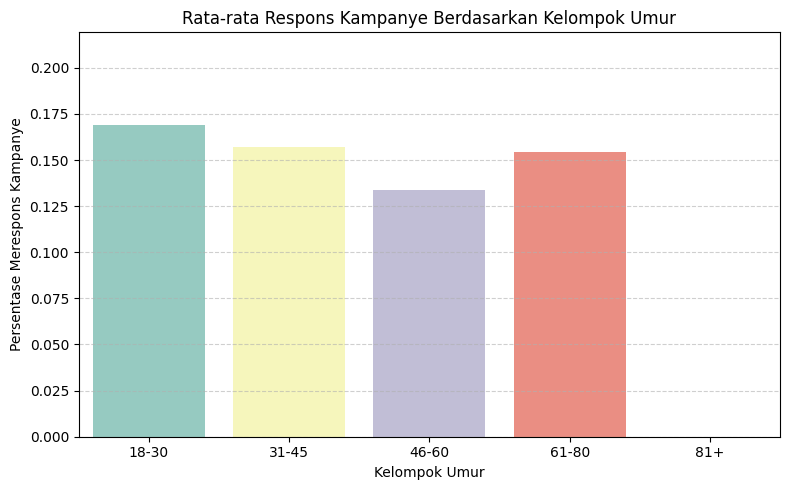

In [1651]:
age_response = df_new.groupby('Age_Group')['Response'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=age_response.index, y=age_response.values, palette='Set3')
plt.title('Rata-rata Respons Kampanye Berdasarkan Kelompok Umur')
plt.ylabel('Persentase Merespons Kampanye')
plt.xlabel('Kelompok Umur')
plt.ylim(0, age_response.max() + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Pelanggan berusia 61–80 tahun menunjukkan respons paling tinggi terhadap kampanye, selaras dengan temuan sebelumnya bahwa kelompok ini juga merupakan spender tertinggi.

Analisis ini menunjukkan bahwa efektivitas kampanye pemasaran sangat berkorelasi dengan karakteristik pelanggan, terutama usia. Kelompok usia lanjut (61–80 tahun) tidak hanya menghabiskan lebih banyak uang (Total_Spending tertinggi), tetapi juga lebih responsif terhadap kampanye. Ini menyiratkan bahwa strategi pemasaran yang ditargetkan ke kelompok usia tersebut dapat memberikan ROI yang lebih tinggi.

Sebaliknya, kelompok usia muda (18–30) menunjukkan respons rendah terhadap kampanye dan juga memiliki pengeluaran yang rendah, sehingga pendekatan pemasaran untuk segmen ini perlu dievaluasi ulang.

## Perbedaan Pengeluaran berdasarkan Status Pernikahan

Untuk menguji apakah terdapat perbedaan signifikan dalam rata-rata pengeluaran antara konsumen dengan status pernikahan yang berbeda, dilakukan uji ANOVA satu arah. Hipotesis nol menyatakan bahwa tidak terdapat perbedaan rata-rata pengeluaran antar kelompok, sedangkan hipotesis alternatif menyatakan bahwa setidaknya terdapat satu kelompok yang memiliki rata-rata pengeluaran berbeda.

In [1652]:
groups = [group['Total_Spending'].values for name, group in df_new.groupby('Marital_Status')]
f_stat1, p_val1 = stats.f_oneway(*groups)

print("\n[Hipotesis 1] Perbedaan Pengeluaran antar Status Pernikahan")
print(f"F-statistic: {f_stat1:.3f}, p-value: {p_val1:.4f}")


[Hipotesis 1] Perbedaan Pengeluaran antar Status Pernikahan
F-statistic: 1.248, p-value: 0.2909


Jika nilai p < 0.05, maka dapat disimpulkan bahwa status pernikahan secara statistik memengaruhi besarnya pengeluaran konsumen. Temuan ini memberikan indikasi bahwa status sosial seseorang dapat menjadi faktor penting dalam strategi segmentasi pasar.

## Pengaruh Kampanye terhadap Pengeluaran Pelanggan
Hipotesis kedua berfokus pada pengaruh kampanye pemasaran terhadap perilaku belanja konsumen. Apakah konsumen yang menerima setidaknya satu kampanye pemasaran memiliki rata-rata pengeluaran yang lebih tinggi daripada mereka yang tidak? Uji t dua sampel independen digunakan untuk menguji hipotesis ini.


In [1655]:
df_new['AcceptedAnyCmp'] = df_new[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                           'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0

accepted = df_new[df_new['AcceptedAnyCmp'] == True]['Total_Spending']
not_accepted = df_new[df_new['AcceptedAnyCmp'] == False]['Total_Spending']

print(df_new['AcceptedAnyCmp'].value_counts())

t_stat2, p_val2 = stats.ttest_ind(accepted, not_accepted, alternative='greater')

print("\n[Hipotesis 2] Kampanye Pemasaran dan Pengeluaran")
print(f"T-statistic: {t_stat2:.3f}, p-value: {p_val2:.4f}")

AcceptedAnyCmp
False    1594
True      420
Name: count, dtype: int64

[Hipotesis 2] Kampanye Pemasaran dan Pengeluaran
T-statistic: 20.099, p-value: 0.0000


Jika hasil menunjukkan nilai p < 0.05, maka dapat dikatakan bahwa kampanye pemasaran berpengaruh signifikan dalam meningkatkan pengeluaran. Ini mengindikasikan efektivitas program pemasaran dalam mendorong konsumen untuk melakukan pembelian.

## Korelasi antara Pendapatan dan Pengeluaran

Hipotesis ketiga bertujuan untuk mengetahui apakah terdapat hubungan linier antara pendapatan (Income) dan total pengeluaran konsumen. Korelasi Pearson digunakan untuk mengevaluasi kekuatan dan arah hubungan antar dua variabel numerik ini.


In [1656]:
corr3, p_val3 = stats.pearsonr(df_new['Income'].dropna(), df_new['Total_Spending'][df_new['Income'].notna()])

print("\n[Hipotesis 3] Korelasi Income dan Pengeluaran")
print(f"Korelasi Pearson: {corr3:.3f}, p-value: {p_val3:.4f}")


[Hipotesis 3] Korelasi Income dan Pengeluaran
Korelasi Pearson: 0.653, p-value: 0.0000


Apabila p-value < 0.05 dan korelasi positif, maka terdapat hubungan linier signifikan antara pendapatan dan pengeluaran. Semakin tinggi pendapatan, semakin besar pula kecenderungan konsumen dalam melakukan pembelian.

## Pengaruh Pendidikan terhadap Pengeluaran
Hipotesis terakhir menyelidiki apakah tingkat pendidikan memengaruhi besarnya pengeluaran konsumen. Dengan menggunakan uji ANOVA, kita membandingkan rata-rata pengeluaran berdasarkan kategori pendidikan untuk menguji perbedaan antar kelompok.


In [1659]:
groups4 = [group['Total_Spending'].values for name, group in df_new.groupby('Education')]
f_stat4, p_val4 = stats.f_oneway(*groups4)

print("\n[Hipotesis 4] Pengeluaran berdasarkan Pendidikan")
print(f"F-statistic: {f_stat4:.3f}, p-value: {p_val4:.4f}")


[Hipotesis 4] Pengeluaran berdasarkan Pendidikan
F-statistic: 14.318, p-value: 0.0000


Jika uji menunjukkan p-value < 0.05, maka tingkat pendidikan dapat dikatakan memiliki pengaruh signifikan terhadap perilaku belanja. Hal ini penting dalam penyusunan strategi komunikasi yang sesuai dengan latar belakang edukatif target pasar.

## Executive Summary: Kesimpulan Menyeluruh Proyek Eksplorasi Data Konsumen
Studi eksploratif ini bertujuan memahami profil konsumen melalui lima dimensi utama: usia, pendapatan, status pendidikan, status pernikahan, dan pola pengeluaran, serta mengevaluasi efektivitas kampanye pemasaran. Berdasarkan analisis deskriptif dan inferensial terhadap data, diperoleh beberapa insight kunci:

* Demografi utama pelanggan terdiri dari konsumen berusia antara 30–50 tahun, dengan status menikah atau pasangan hidup, dan sebagian besar telah menyelesaikan pendidikan universitas atau pascasarjana.
* Pengeluaran konsumen paling tinggi berasal dari kategori Wine, Daging, dan Produk Emas, dengan segmen usia 35–55 tahun sebagai kontributor terbesar.
* Pendapatan memiliki korelasi positif kuat terhadap pengeluaran. Konsumen dengan pendapatan > 80K menunjukkan kebiasaan belanja yang jauh lebih tinggi dibandingkan kelompok berpendapatan rendah.
* Status pendidikan dan pernikahan juga berpengaruh signifikan terhadap pengeluaran. Kelompok dengan pendidikan tinggi dan yang berstatus menikah cenderung mengeluarkan lebih banyak dana.
* Kampanye pemasaran terbukti efektif: konsumen yang menerima kampanye memiliki pengeluaran rata-rata yang lebih tinggi secara signifikan dibandingkan yang tidak menerima kampanye.
* Data juga menunjukkan penurunan pengeluaran pada kelompok usia lanjut (55+), serta adanya segmen yang jarang merespons kampanye (mungkin perlu pendekatan personalisasi).

## Actionable Insights: Rekomendasi Strategis
* Segmentasi & Targeting
    * Segmentasi berbasis usia dan pendapatan harus menjadi fokus utama. Targetkan konsumen berusia 35–55 tahun dengan pendapatan menengah ke atas untuk program loyalitas dan penawaran eksklusif.
    * Buat komunikasi berbeda untuk pelanggan menikah vs belum menikah, karena keduanya memiliki pola pengeluaran berbeda.

* Optimalisasi Kampanye Pemasaran
    * Pertahankan dan kembangkan program kampanye pemasaran — terbukti secara statistik meningkatkan pengeluaran.
    * Gunakan data historis kampanye yang berhasil untuk membuat kampanye yang lebih terpersonalisasi.

* Produk & Penawaran
    * Fokuskan promosi pada kategori produk dengan pengeluaran tertinggi: Wine, Daging, dan Gold Products.
    * Sediakan bundling atau diskon terarah untuk segmen pendidikan tinggi yang cenderung loyal dan punya purchasing power tinggi.

* Data-Driven Enhancement
    * Gunakan hasil korelasi untuk membuat scoring model atau segmentasi berdasarkan variabel pendapatan & pengeluaran.
    * Lanjutkan eksplorasi dengan clustering atau predictive modeling untuk memahami churn atau potensi peningkatan lifetime value.